In [2]:
# Data reading
import pandas as pd
import numpy as np
# Graph Generation
import matplotlib.pyplot as plt
import seaborn as sns
# Neural Network
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.utils import to_categorical

In [7]:
def wineClass(df):
  #test classification of wine
  #define a wine as "higher quality" if its quality parameter is above 7
  df['HigherQuality'] = [1 if x >= 7 else 0 for x in df['quality']]

  #separate feature variables and target variable
  x = df.drop(['quality','HigherQuality'], axis = 1)
  y = df['HigherQuality']

  #see proportion of good vs bad wines
  print(df['HigherQuality'].value_counts())

  #define a wine as "high-average quality" if its quality parameter equals 6
  df['HighAverageQuality'] = [1 if x == 6 else 0 for x in df['quality']]

  #separation of variables
  x = df.drop(['quality', 'HighAverageQuality'], axis = 1)
  y = df['HighAverageQuality']
  #see proportion
  print(df['HighAverageQuality'].value_counts())

  #define a wine as "low-average quality" if its quality parameter equals 6
  df['LowAverageQuality'] = [1 if x == 5 else 0 for x in df['quality']]

  #separation of variables
  x = df.drop(['quality', 'LowAverageQuality'], axis = 1)
  y = df['LowAverageQuality']
  #see proportion
  print(df['LowAverageQuality'].value_counts())

  #define a wine as "low quality" if its quality parameter equals 6
  df['LowQuality'] = [1 if x <= 4 else 0 for x in df['quality']]

  #separation of variables
  x = df.drop(['quality', 'LowQuality'], axis = 1)
  y = df['LowQuality']
  #see proportion
  print(df['LowQuality'].value_counts())

Shape of DataFrame: (1360, 12)
fixed acidity              7.4
volatile acidity           0.7
citric acid                0.0
residual sugar             1.9
chlorides                0.076
free sulfur dioxide       11.0
total sulfur dioxide      34.0
density                 0.9978
pH                        3.51
sulphates                 0.56
alcohol                    9.4
quality                      5
Name: 1, dtype: object
fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     floa

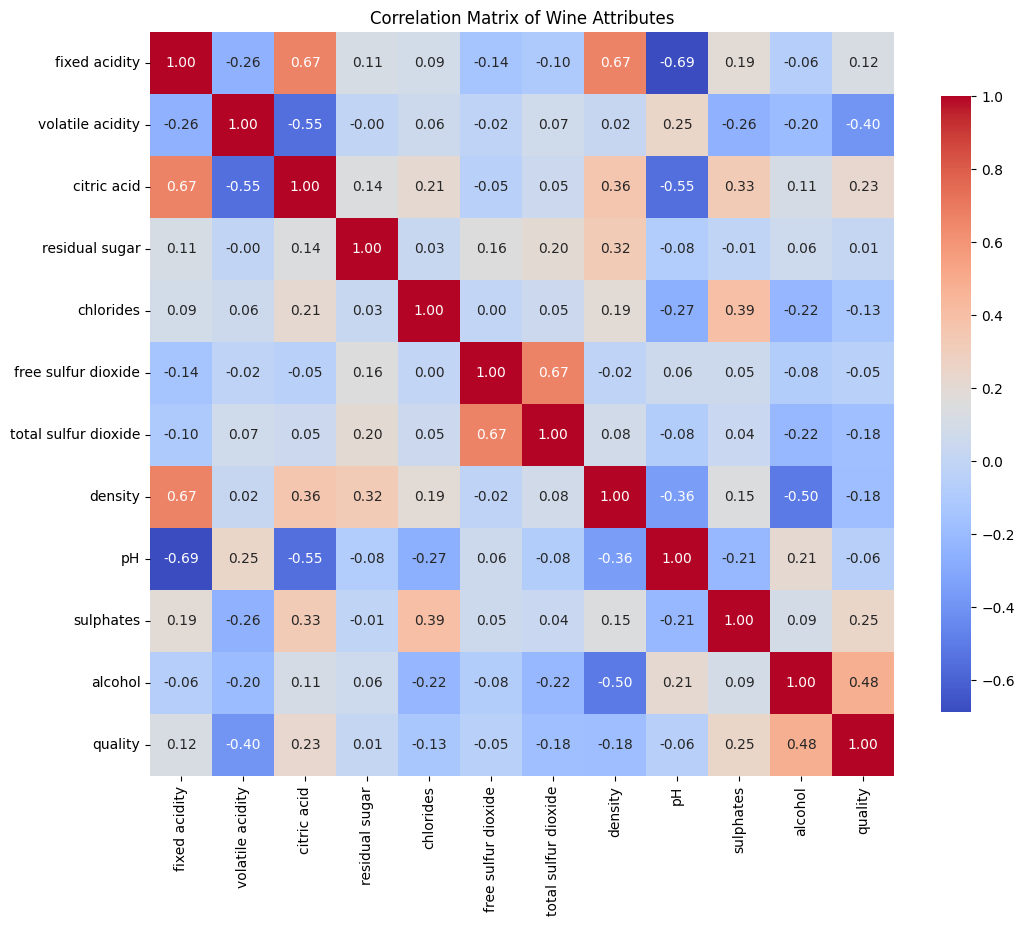

(1087, 9)
(978, 9)
(109, 9)
Validation loss: 4.57%
Validation accuracy: 99.08%


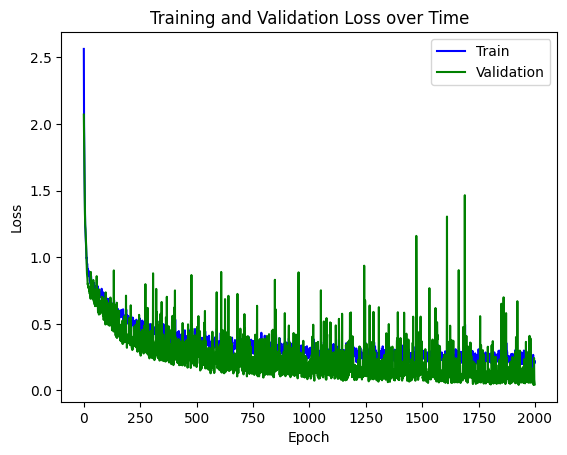

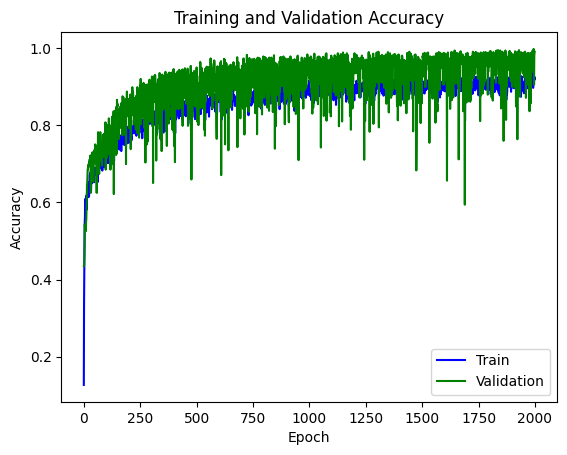

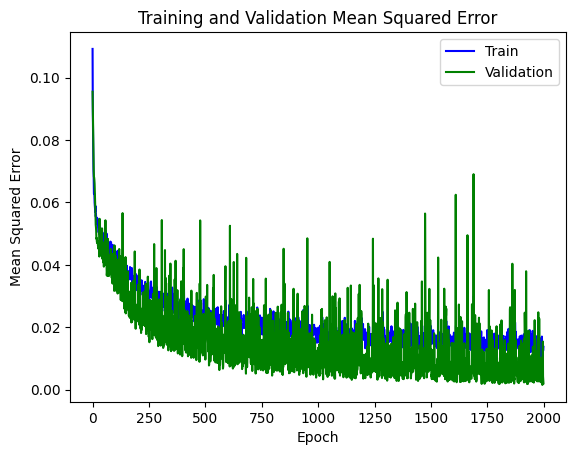

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


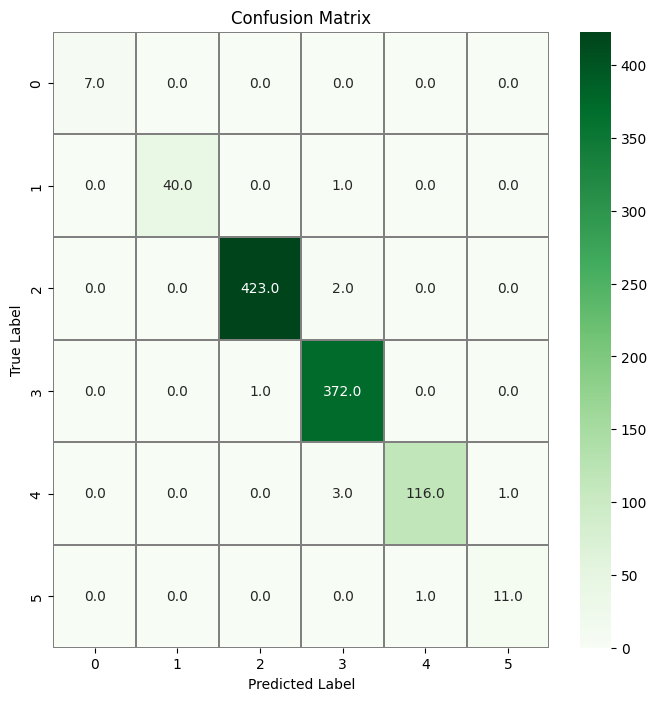

Test loss: 5.38%
Test accuracy: 99.08%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Maximum probabilities of Test set:  [0.99750537 0.99761933 0.98648405 0.9779681  0.9611174  0.9484945
 0.97314465 0.99980736 0.99231535 0.99620974 0.9987512  0.9994891
 0.99267155 0.81131476 0.9928611  0.9996748  0.9995763  0.94353884
 0.9917282  0.9853479  0.94043326 0.9998393  0.9993579  0.9949133
 0.9999612  0.99126726 0.9804528  0.81775075 0.9976839  0.7314917
 0.9834786  0.9880937  0.6618368  0.99457765 0.99092096 0.99526566
 0.97819406 0.9454743  0.9943414  0.9918388  0.9916571  0.98938584
 0.9787427  0.99998575 0.9452158  0.999605   0.94938326 0.9834092
 0.81788903 0.9943036  0.9980154  0.99010193 0.99796855 0.8679437
 0.94784254 0.98884016 0.66631925 0.9710665  0.995974   0.92246884
 0.63098717 0.8862792  0.9994191  0.9998493  0.8080792  0.9984663
 0.9977956  0.9859498  0.99998635 0.9852729  0.9915806  0.96931624
 0.9788783  0.9928371  0.9977422  0.68093336 0.99308443 0.9773307
 0.9959484  0.7823999  0

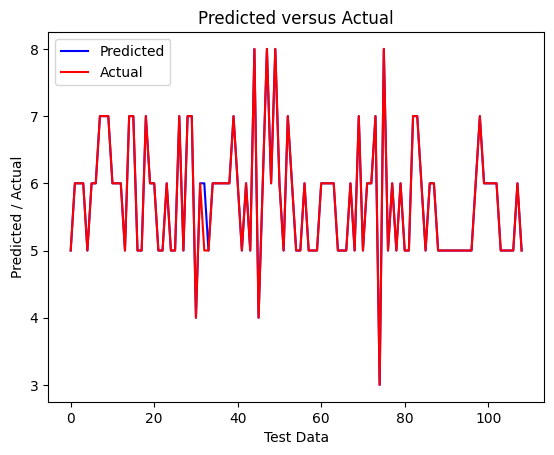

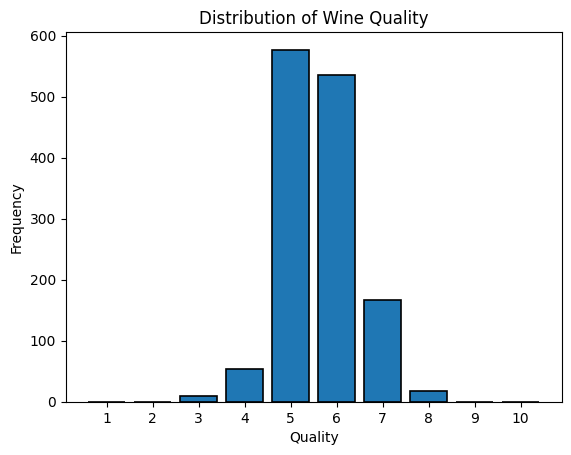

HigherQuality
0    1175
1     184
Name: count, dtype: int64
HighAverageQuality
0    824
1    535
Name: count, dtype: int64
LowAverageQuality
0    782
1    577
Name: count, dtype: int64
LowQuality
0    1296
1      63
Name: count, dtype: int64


In [8]:
def main():

  # Columnn naming
  column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                  'pH', 'sulphates', 'alcohol', 'quality']

  # csv reading
  dataset = pd.read_csv("https://raw.githubusercontent.com/QueenMelissoula/WineDataTest/main/cleaned_wine_data.csv", header=None, names=column_names)

  print('Shape of DataFrame: {}'.format(dataset.shape))
  print(dataset.loc[1])

  # Clean dataset
  df = dataset.replace('?', np.nan).dropna()
  print(df.dtypes)

  # transform data to numeric and replace non-numeric values with NaN
  df = df.apply(pd.to_numeric, errors='coerce')

  # drop NaN values
  df = df.dropna()

  print(df.dtypes)

  # print data characteristics
  print(df.describe())

  # Calculate the correlation matrix
  correlation_matrix = df.corr()

  # Set up the matplotlib figure
  plt.figure(figsize=(12, 10))

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

  plt.title('Correlation Matrix of Wine Attributes')
  plt.show()

  # Convert the data to X and Y
  X = df.drop('quality', axis=1).values
  Y = df['quality'].values

  # Divide the data into test, validation, and training sets.
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=1, test_size=0.2)
  X_val, X_test, y_val, y_test = model_selection.train_test_split(X_train, y_train, random_state=2, test_size=0.1)

  # transform the category labels from the data classes.
  Y_train = to_categorical(y_train, num_classes=None)
  Y_val = to_categorical(y_val, num_classes=None)
  Y_test = to_categorical(y_test, num_classes=None)

  print(Y_train.shape)
  print(Y_val.shape)
  print(Y_test.shape)

  # Scale the data
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)
  X_test = scaler.transform(X_test)

  # Converting the arrays
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_val, y_val = np.array(X_val), np.array(y_val)
  X_test, y_test = np.array(X_test), np.array(y_test)

  # Converting the y arrays to float
  y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)

  # Form train, validation and test datasets
  train_dataset = (X_train, Y_train)
  val_dataset = (X_val, Y_val)
  test_dataset = (X_test, Y_test)

  # establish a function for creating the Keras model.
  def create_model(input_shape, num_outputs, learning_rate, num_units, dropout_rate, momentum, activation, num_layers):
      # establish the input layer
      inputs = Input(shape=input_shape)

      # Add the specified number of layers
      x = inputs
      for i in range(num_layers):
          # dense layer
          x = Dense(num_units)(x)
          # activation layer
          x = Activation(activation)(x)
          # batch normalization layer
          x = BatchNormalization()(x)
          # dropout layer
          x = Dropout(dropout_rate)(x)

      # output layer
      outputs = Dense(num_outputs, activation='softmax')(x)

      # form the model
      model = Model(inputs=inputs, outputs=outputs)

      # form the optimizer
      optimizer = Nadam(learning_rate=learning_rate, beta_1=momentum)

      # model compilation
      model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', 'mean_squared_error'])
      return model

  # hyperparameters first values
  # LEARNING_RATE = 0.001
  # N_NEURONS = 25
  # DROPOUT_RATE = 0.2
  # sMOMENTUM = 0.0
  # BATCH_SIZE = 25
  # EPOCHS = 100
  # N_LAYERS = 6

  # hyperparameters
  LEARNING_RATE = 0.001
  N_NEURONS = 30
  DROPOUT_RATE = 0.0
  sMOMENTUM = 0.0
  BATCH_SIZE = 30
  EPOCHS = 2000
  N_LAYERS = 6

  # form the model
  model = create_model((train_dataset[0].shape[1],), train_dataset[1].shape[1],
                        LEARNING_RATE, N_NEURONS, DROPOUT_RATE, sMOMENTUM, 'relu', N_LAYERS)

  # Train the model
  history = model.fit(train_dataset[0], train_dataset[1], batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0,
                      validation_data=val_dataset)

  # assesing the model by using the validation dataset
  score = model.evaluate(val_dataset[0], val_dataset[1], verbose=0)

  print("Validation loss: %.2f%%" % (score[0] * 100))
  print("Validation accuracy: %.2f%%" % (score[1] * 100))

  # training and validation loss plot
  plt.plot(history.history['loss'], color='blue')
  plt.plot(history.history['val_loss'], color='green')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss over Time')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

  # training and validation accuracy plot
  plt.plot(history.history['accuracy'], color='blue')
  plt.plot(history.history['val_accuracy'], color='green')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.legend(['Train', 'Validation'], loc='lower right')
  plt.show()

  # mean squared error plot
  plt.plot(history.history['mean_squared_error'], color='blue')
  plt.plot(history.history['val_mean_squared_error'], color='green')
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.title('Training and Validation Mean Squared Error')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

  # confusion matrix plot
  Y_pred = history.model.predict(X_val)
  Y_pred_classes = np.argmax(Y_pred, axis=1)
  Y_true = np.argmax(Y_val, axis=1)
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
  f, ax = plt.subplots(figsize=(8, 8))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

  # test dataset
  score = history.model.evaluate(test_dataset[0], test_dataset[1], verbose=0)

  # Print the test accuracy
  print("Test loss: %.2f%%" % (score[0] * 100))
  print("Test accuracy: %.2f%%" % (score[1] * 100))

  # test set results predictions
  Y_pred = history.model.predict(test_dataset[0])
  Y_pred_classes = np.argmax(Y_pred, axis=1)
  Y_true = np.argmax(test_dataset[1], axis=1)

  print("Maximum probabilities of Test set: ", np.max(Y_pred, axis=-1))

  for i in Y_pred:
      if np.max(i) < 0.8:
          print("Low probability of Test set: ", i)
      elif np.max(i) > 0.5:
          print("High probability of Test set: ", i)
      elif np.max(i) > 0.3:
          print("Very high probability of Test set: ", i)
      else:
          print("None")

  print("Classification Accuracy of Test set: %.2f%%" % (accuracy_score(Y_true, Y_pred_classes) * 100))

  print("Classification Report of Test set: ", classification_report(Y_true, Y_pred_classes, zero_division=0))

  # testing and predicted values graph
  plt.plot(Y_pred_classes, color='blue')
  plt.plot(Y_true, color='red')
  plt.title('Predicted versus Actual')
  plt.ylabel('Predicted / Actual')
  plt.xlabel('Test Data')
  plt.legend(['Predicted', 'Actual'], loc='upper left')
  plt.show()

  # Generate a histogram for the 'quality' column
  plt.hist(df['quality'], bins=np.arange(1, 12) - 0.5, edgecolor='black', linewidth=1.2, rwidth=0.8)
  plt.title('Distribution of Wine Quality')
  plt.xlabel('Quality')
  plt.ylabel('Frequency')
  plt.xticks(np.arange(1, 11))
  plt.show()

  wineClass(df)

if __name__ == "__main__":
    main()
